In [18]:
import pandas
import matplotlib.pyplot as plt

In [7]:
annotation = pandas.read_csv('results/annotated_peaks.txt', sep='\t')
annotation['absDistance'] = annotation['Distance to TSS'].abs()
rnaseq = pandas.read_csv('GSE75070_MCF7_shRUNX1_shNS_RNAseq_log2_foldchange.txt.gz', compression='gzip', sep='\t')
rnaseq['absFC'] = rnaseq['log2FoldChange'].abs()
rnaseq_de = rnaseq.query('padj < .01 and absFC >1')
de_up = rnaseq_de.query('log2FoldChange > 0')['genename'].tolist()
de_down = rnaseq_de.query('log2FoldChange < 0')['genename'].tolist()

In [14]:
up_within_5 = len(set(annotation.query("`Gene Name` in @de_up and absDistance <= 5000")['Gene Name'].tolist()))
up_notwithin_5 = len(de_up) - up_within_5
down_within_5 = len(set(annotation.query("`Gene Name` in @de_down and absDistance <= 5000")['Gene Name'].tolist()))
down_notwithin_5 = len(de_down) - down_within_5

up_within_20 = len(set(annotation.query('`Gene Name` in @de_up and absDistance <= 20000')["Gene Name"].tolist()))
up_notwithin_20 = len(de_up) - up_within_20
down_within_20 = len(set(annotation.query('`Gene Name` in @de_down and absDistance <= 20000')["Gene Name"].tolist()))
down_notwithin_20 = len(de_down) - down_within_20

In [15]:
bound = [up_within_5, down_within_5, up_within_20, down_within_20]
notbound = [up_notwithin_5, down_notwithin_5, up_notwithin_20, down_notwithin_20]
labels = ['Upregulated +/- 5kb', 'Downregulated +/- 5kb', 'Upregulated +/- 20kb', 'Downregulated +/- 20kb']

In [33]:
def pct_stacked_bar(bound, notbound, labels, title, dpi):
    fig, ax = plt.subplots(dpi=dpi, figsize=(6,8))
    bound_pct = [(bound[i] / (bound[i] + notbound[i])) for i, val in enumerate(bound)]
    notbound_pct = [(notbound[i] / (bound[i] + notbound[i])) for i, val in enumerate(notbound)]
    width = .9
    ax.bar(labels, bound_pct, width, label='Bound')
    ax.bar(labels, notbound_pct, width, bottom=bound_pct, label='Not Bound')
    ax.set_xticks(labels)
    ax.set_xticklabels(labels=labels, rotation=90)
    plt.title(title)
    ax.legend()
    ax.set_ylabel('Proportion of genes')
    box = ax.get_position()
    box = ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    patch_labels = bound + notbound
    y_offset = -.05
    for i, bar in enumerate(ax.patches):
        ax.text(bar.get_x() + bar.get_width() / 2,
               bar.get_height() + bar.get_y() + y_offset, patch_labels[i],
               ha='center', color='w', weight='bold', size=10)
        
    plt.show()
    return ax

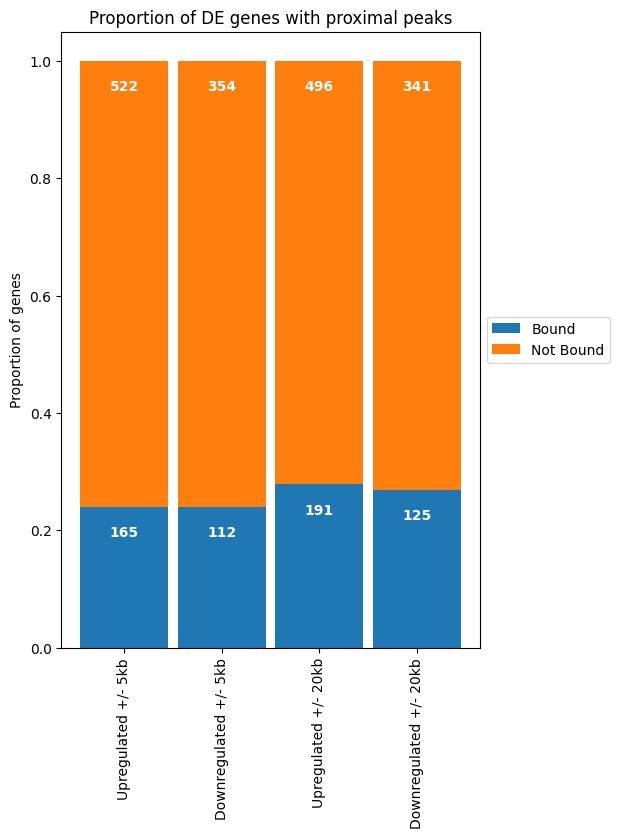

In [34]:
ax = pct_stacked_bar(bound, notbound, labels, 'Proportion of DE genes with proximal peaks', 100)